In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [2]:
train= pd.read_csv("C://Users//HP//Desktop//ML - datasets//train.csv")
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
train.shape

(54808, 14)

In [4]:
test= pd.read_csv("C://Users//HP//Desktop//ML - datasets//test.csv")
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
train= train.drop(['employee_id'], axis=1)

In [6]:
train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
train.shape[1]

13

In [8]:
train.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [9]:
train.info()
#we can see that there are missing values in education and previousyr ratings 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [10]:
train.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
train.isnull().mean()*100

department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [12]:
print(train.education)

0        Master's & above
1              Bachelor's
2              Bachelor's
3              Bachelor's
4              Bachelor's
               ...       
54803          Bachelor's
54804    Master's & above
54805          Bachelor's
54806                 NaN
54807          Bachelor's
Name: education, Length: 54808, dtype: object


In [13]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [15]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

EXPLORATORY DATA ANALYSIS 

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns 

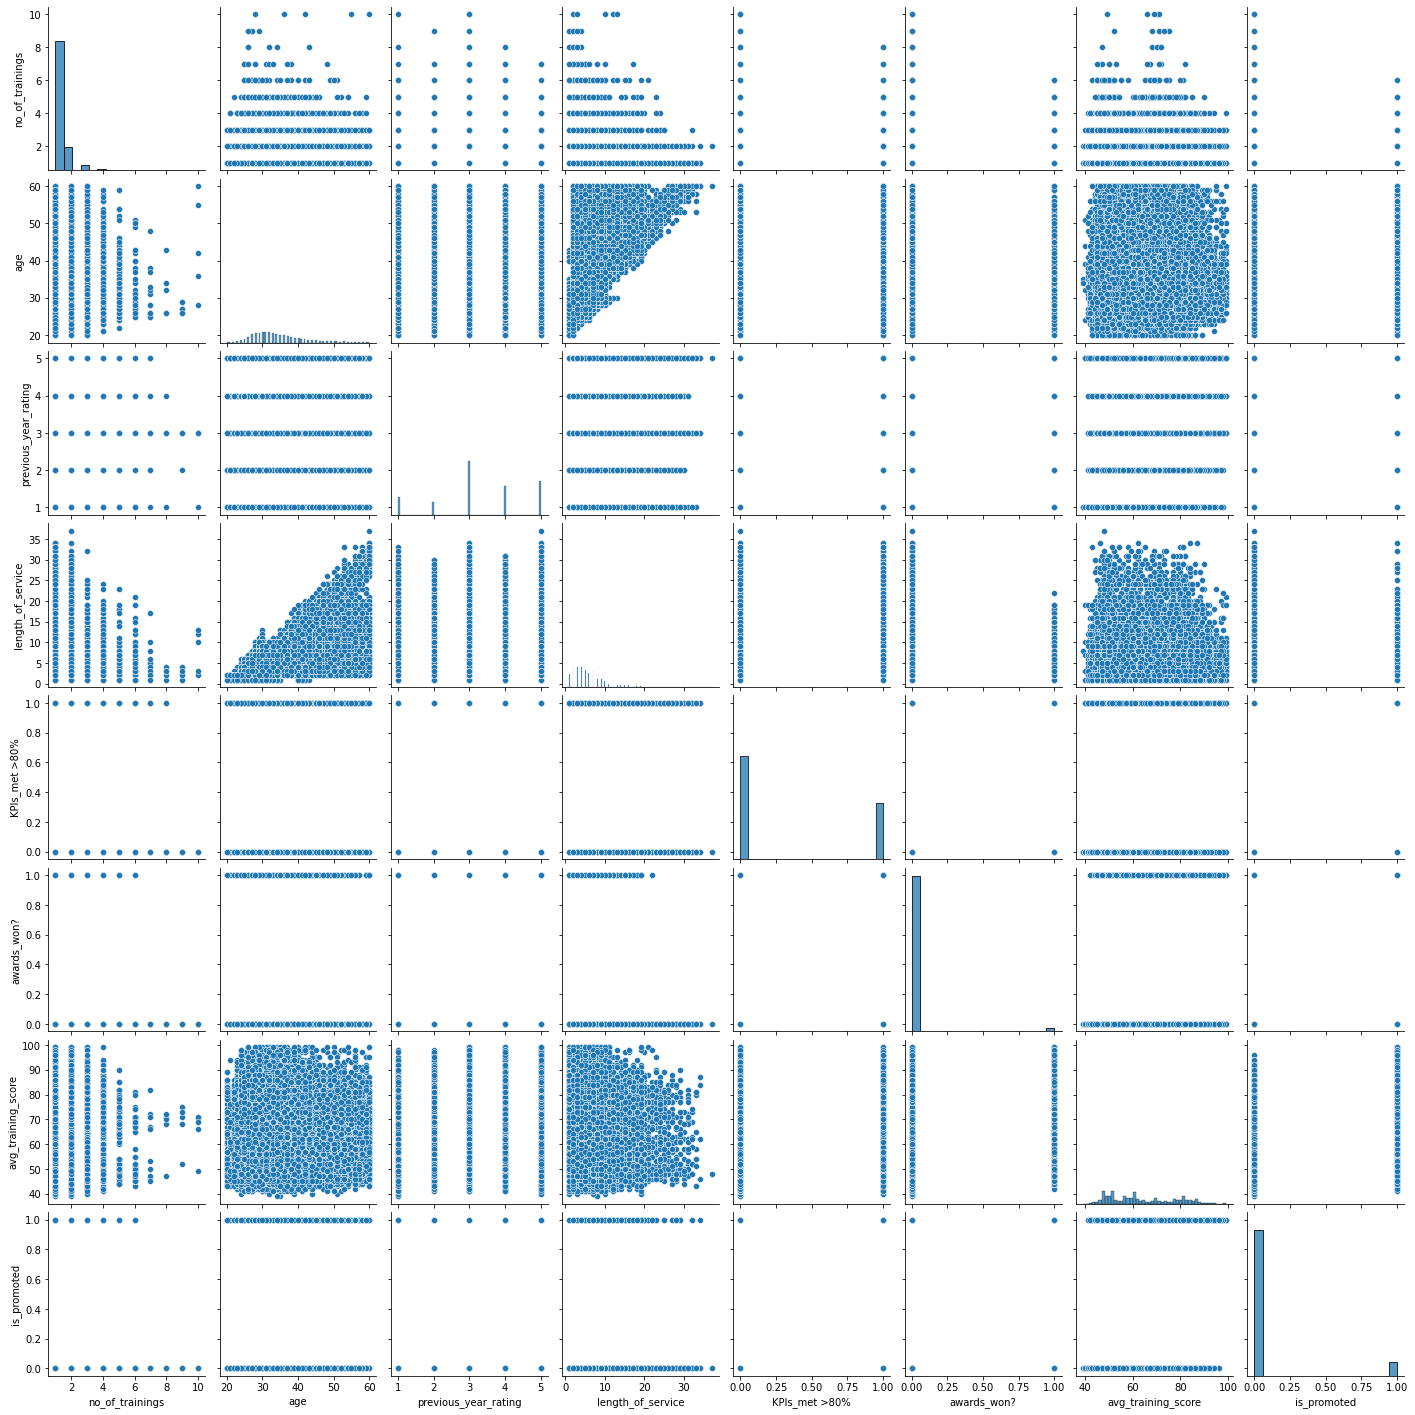

In [17]:
sns.pairplot(train)

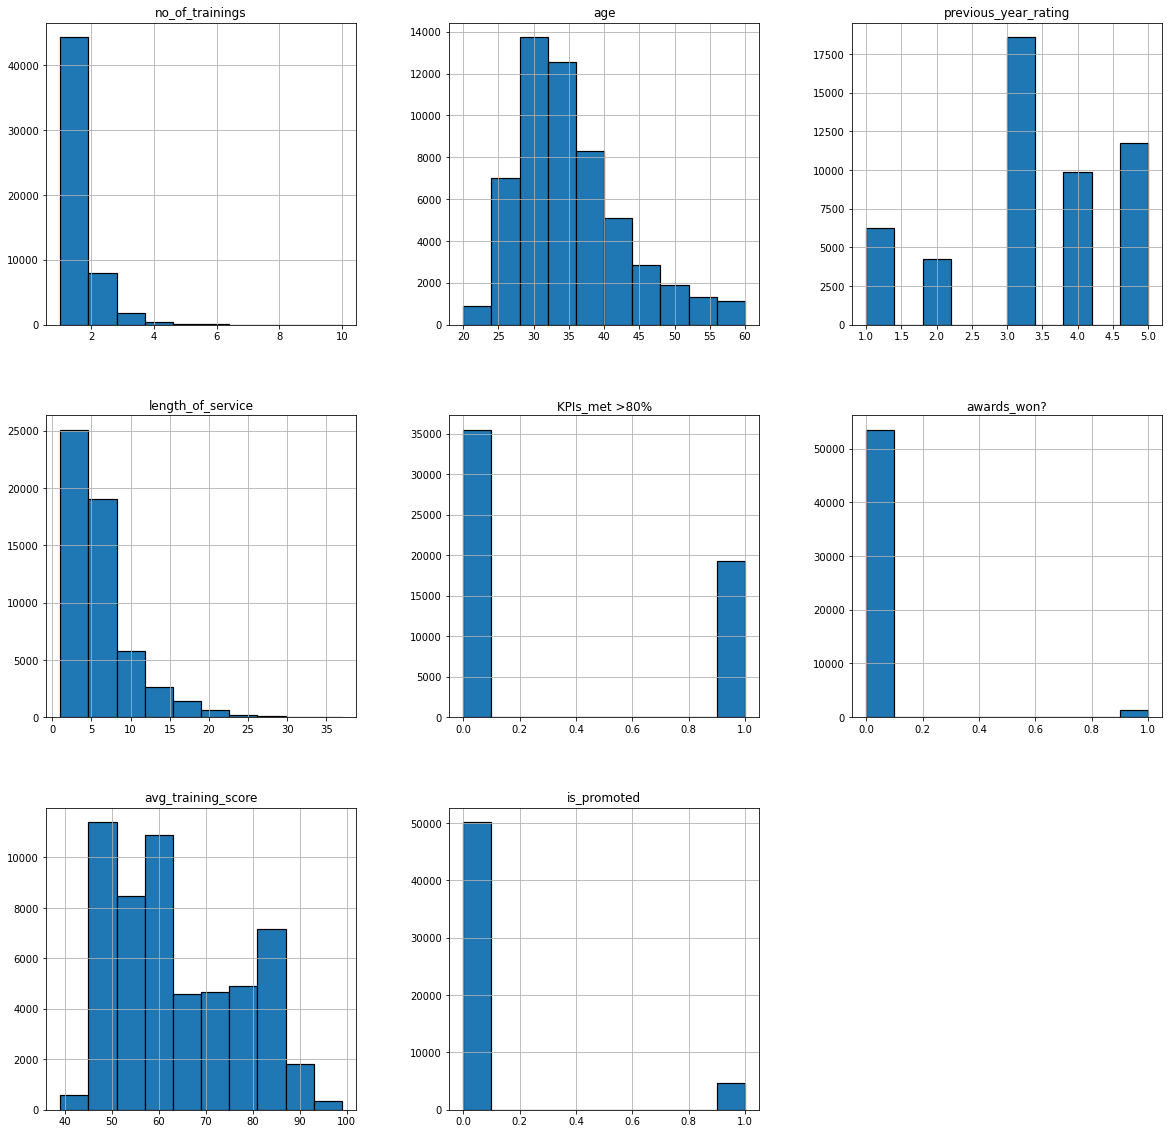

In [18]:
#visualising the distribution of data for evry feature 
train.hist(edgecolor='black', linewidth=1.2 ,figsize=(20,20));

In [19]:
#conclusions made from hist plot 
#1) no .people who have won are below 2000
# 2)no. of people promoted are also low below 5000
# 3) avg training score is between 4000-10000
# 4)age group of people working(max) is around 30-35
# 5)employee_id is insignificant to the data 

In [20]:
#moving one by one across all columns 
train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

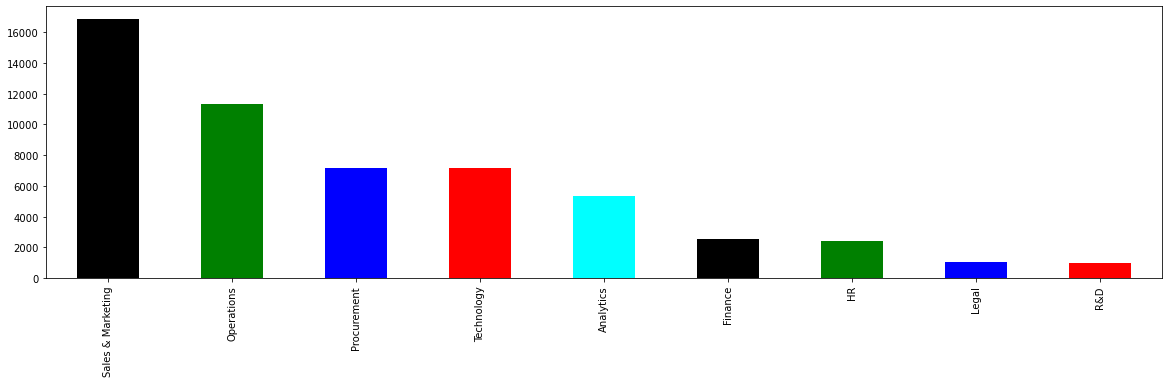

In [21]:
plt.subplots(figsize=(20,5))
train['department'].value_counts(normalize= True)
train['department'].value_counts(dropna=False).plot.bar(color= ['black', 'green', 'blue','red','cyan'])
plt.show()

In [22]:
train['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

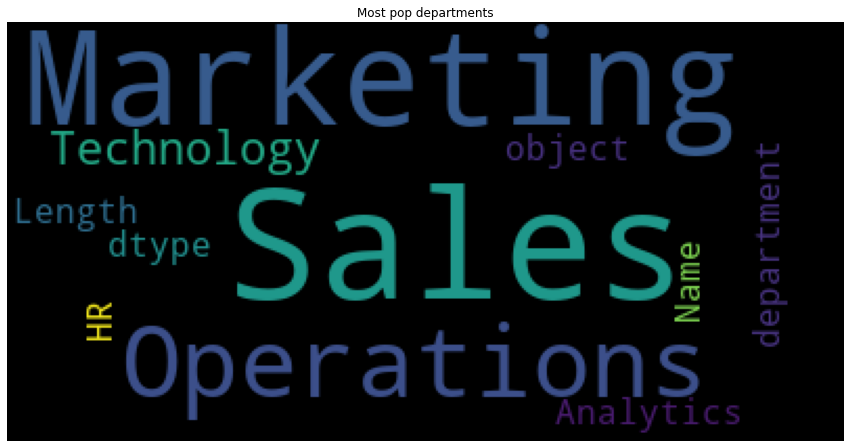

In [23]:
#checking most popular department 
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
stopword= set(STOPWORDS)#removes words from the set which do not add any meaning to the sentence 

wordcloud= WordCloud(stopwords= stopword).generate(str(train['department']))

plt.rcParams['figure.figsize']=(15,8)
print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most pop departments')
plt.axis('off')
plt.show()



In [24]:
#from this wordcloud it is visible that sales and marketing and operations are the most pop departments 


In [25]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

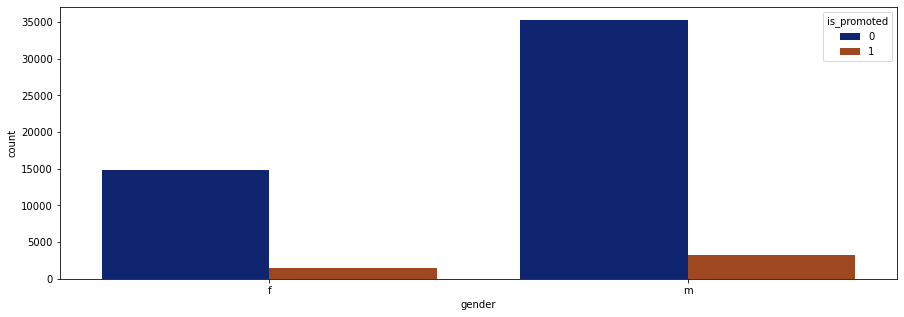

In [26]:
#relation between gender and promoted 
plt.subplots(figsize=(15,5))
sns.countplot(x='gender', data=train, hue='is_promoted',palette='dark')
plt.show()


In [27]:
#from this supply it is shown that no.of males promoted are more than female but the no.of males not promoted are also more 
# than female

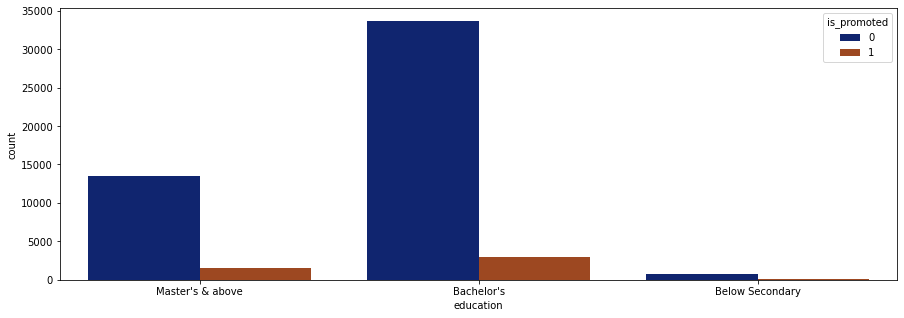

In [28]:
#lets find the correlation of promoted and education 
plt.subplots(figsize=(15,5))
sns.countplot(x='education', data=train, hue='is_promoted',palette='dark')
plt.show()
#very clear from the plot that the people with below secondary school are not promoted .people with bachelors education have 
# been promoted at max

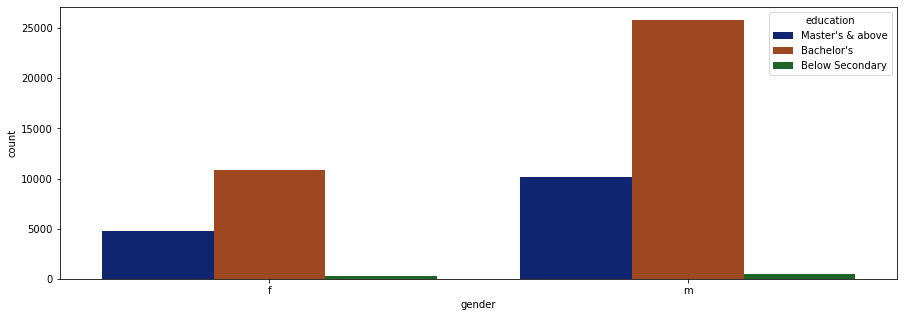

In [29]:
#relationship with gender and education
plt.subplots(figsize=(15,5))
sns.countplot(x='gender', data=train, hue='education',palette='dark')
plt.show()

In [30]:
train['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

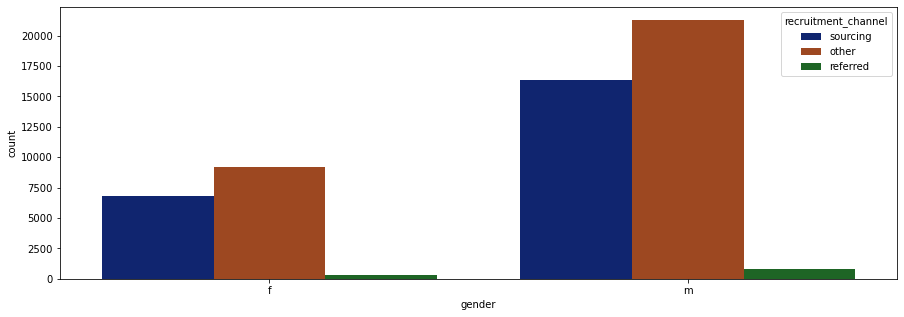

In [31]:
plt.subplots(figsize=(15,5))
sns.countplot(x='gender', data=train, hue='recruitment_channel',palette='dark')
plt.show()

In [32]:
# distribution of previous year rating 
train['previous_year_rating'].value_counts()
# max rating 3

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


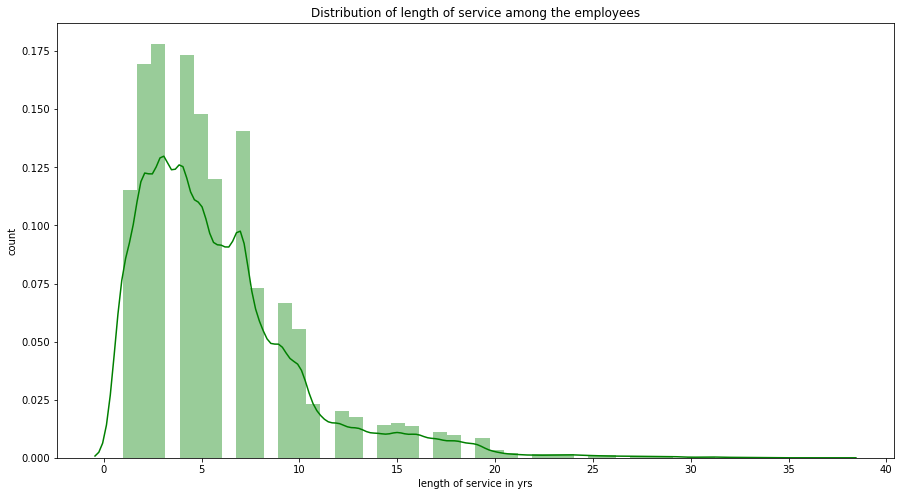

In [33]:
#distribution of length of service 
plt.subplots(figsize=(15,8))
sns.distplot(train['length_of_service'], color='green')
plt.title('Distribution of length of service among the employees')
plt.xlabel('length of service in yrs')
plt.ylabel('count')
plt.show()

In [34]:
#maximum yrs/average yrs of people in service is between 2-7 yrs 

In [35]:
train['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

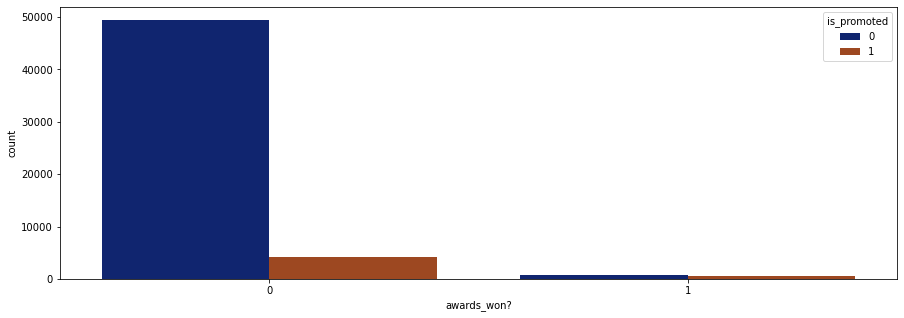

In [36]:
plt.subplots(figsize=(15,5))
sns.countplot(x='awards_won?', data=train, hue='is_promoted',palette='dark')
plt.show()
#almost the same no.of people who got awards have been promoted and people who didnot won also got promoted 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


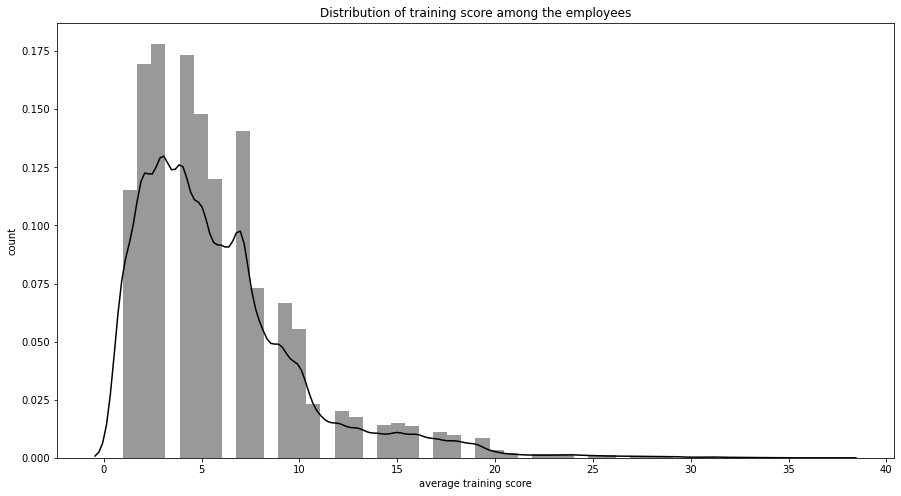

In [37]:
plt.subplots(figsize=(15,8))
sns.distplot(train['length_of_service'], color='black')
plt.title('Distribution of training score among the employees')
plt.xlabel('average training score')
plt.ylabel('count')
plt.show()

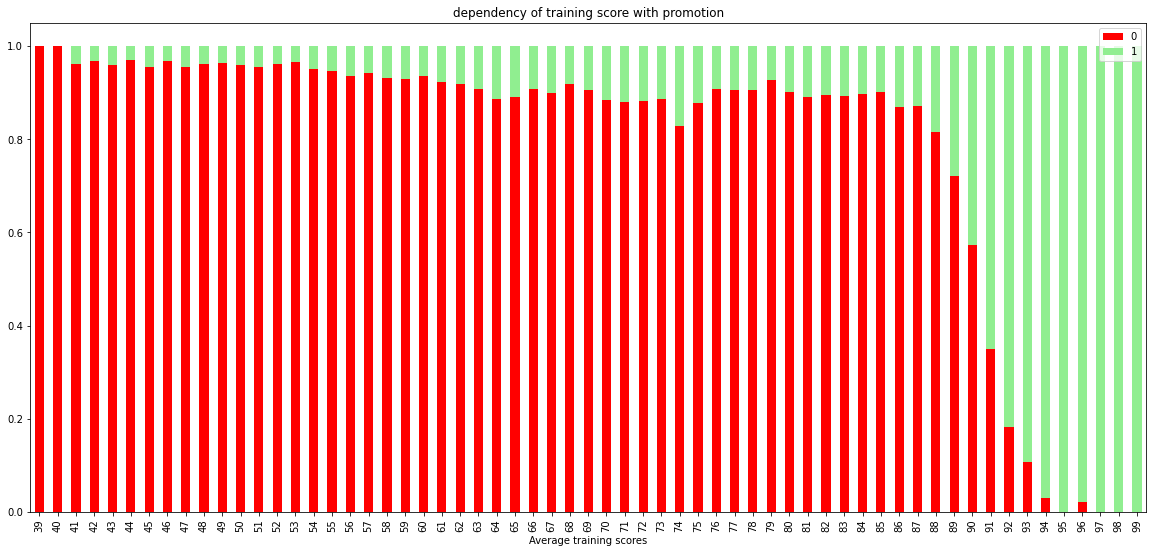

In [38]:
#scatter plot between average training score and is_promoted 
data= pd.crosstab(train['avg_training_score'], train['is_promoted'])
data.div(data.sum(1).astype(float) ,axis=0).plot(kind='bar', stacked= True, figsize=(20,9) ,color=['red', 'lightgreen'])
plt.title('dependency of training score with promotion')
plt.xlabel('Average training scores')
plt.legend()
plt.show()


In [39]:
#people who have more than 95 training score have been promoted but people with low training scores have not 

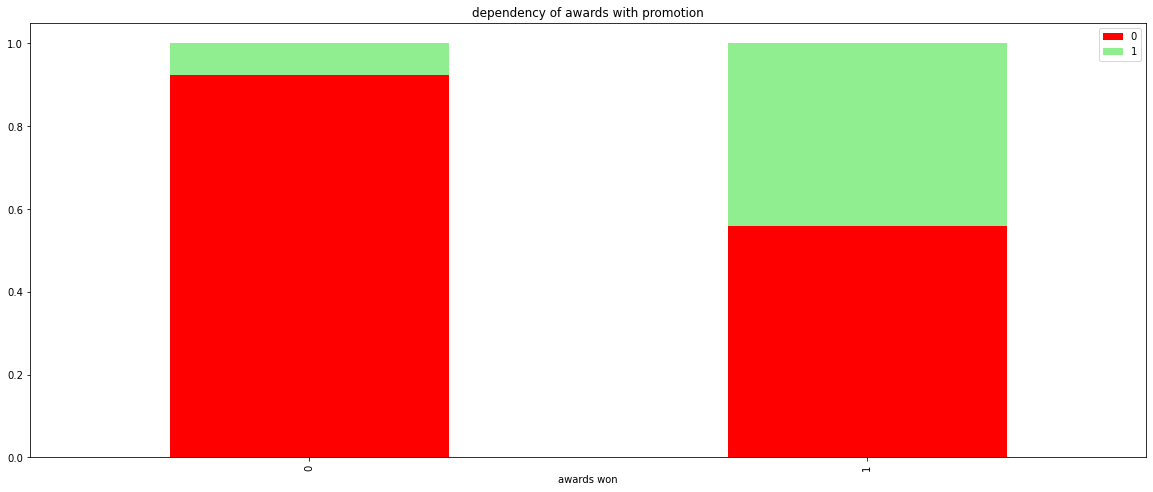

In [40]:
data= pd.crosstab(train['awards_won?'], train['is_promoted'])
data.div(data.sum(1).astype(float) ,axis=0).plot(kind='bar', stacked= True, figsize=(20,8) ,color=['red', 'lightgreen'])
plt.title('dependency of awards with promotion')
plt.xlabel('awards won')
plt.legend()
plt.show()
#red part shows the people who have not been promoted .in the 1st graph we can see that the people who have not been awarded 
#have largely not been promoted. but in 2nd graph for people who have been awarded have been promoted in 50-50 ratio

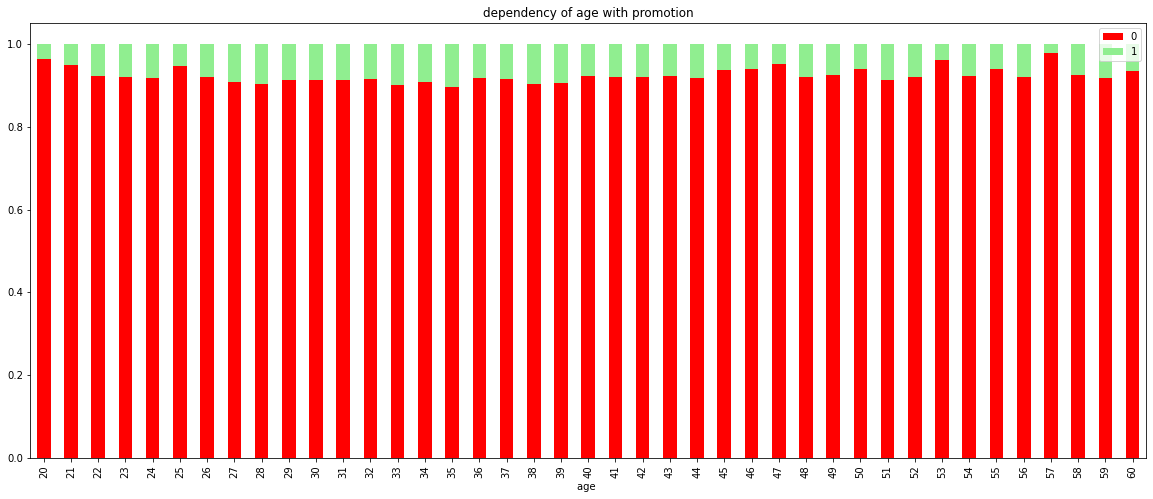

In [41]:
data= pd.crosstab(train['age'], train['is_promoted'])
data.div(data.sum(1).astype(float) ,axis=0).plot(kind='bar', stacked= True, figsize=(20,8) ,color=['red', 'lightgreen'])
plt.title('dependency of age with promotion')
plt.xlabel('age ')
plt.legend()
plt.show()
#people in the age group of 25-45 are promoted more comparitively 

# DATA PREPROCESSING 

In [42]:
#filling in the missing values using mode method for categorical variables 
train['education'].fillna(train['education'].mode()[0] , inplace=True)
train['previous_year_rating'].fillna(1, inplace=True)
train.isnull().sum()


department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [43]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [44]:
train.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [45]:
#splitting the training and testing datasets 
x= train.iloc[:, :-1]
y= train.iloc[:,-1]
print(x.shape)
print(y.shape)

(54808, 12)
(54808,)


In [52]:
x= pd.get_dummies(x)
x.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'dept_new',
       'region_new', 'educ_new', 'gen_new', 'recr_new', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 're

In [46]:
#ohe for categorical variables 
from sklearn.preprocessing import OneHotEncoder
x['department']= x['department'].astype('category')
x['region']=  x['region'].astype('category')
x['education']=  x['education'].astype('category')
x['gender']=  x['gender'].astype('category')
x['recruitment_channel']=  x['recruitment_channel'].astype('category')

x['dept_new']= x['department'].cat.codes
x['region_new']= x['region'].cat.codes
x['educ_new']= x['education'].cat.codes
x['gen_new']= x['gender'].cat.codes
x['recr_new']= x['recruitment_channel'].cat.codes

enc=OneHotEncoder()

enc_data=pd.DataFrame(enc.fit_transform(x[['dept_new','region_new','educ_new','gen_new','recr_new' ]]).toarray())
New_df= x.join(enc_data)
print(New_df)
 

              department     region         education gender  \
0      Sales & Marketing   region_7  Master's & above      f   
1             Operations  region_22        Bachelor's      m   
2      Sales & Marketing  region_19        Bachelor's      m   
3      Sales & Marketing  region_23        Bachelor's      m   
4             Technology  region_26        Bachelor's      m   
...                  ...        ...               ...    ...   
54803         Technology  region_14        Bachelor's      m   
54804         Operations  region_27  Master's & above      f   
54805          Analytics   region_1        Bachelor's      m   
54806  Sales & Marketing   region_9        Bachelor's      m   
54807                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   35                   5.0   
1                   other                1   30                   5.0   
2           

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [55]:
from sklearn.preprocessing import StandardScaler 
sc= StandardScaler()
x_train= sc.fit_transform(X_train)
x_test= sc.fit_transform(X_test)

# FITTING OF MODELS 

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)

print("Training Accuracy :", rfc.score(x_train, y_train))

Training Accuracy : 0.9998910705046159


In [57]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [59]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9270194062033504


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93
